# A tutorial for Kaggle Titanic competition using Neural Network with Keras

This is a tutorial about how to use Keras to build a Neural Network to solve Kaggle's Titanic competition. Kaggle is a competition site which provides problems to solve or questions to ask while providing the datasets for training your data science model and testing the model results against a test dataset. The Titanic competition is usually the first competition you will come across on Kaggle.

This tutorial follows a typical workflow of machine learning project. 
1. Define the problem 
2. Acquire the data
3. Prepare the data 
4. Define the model
5. Train and fine-tune the model
6. Test and deploy the model

## 1. Define the problem
The question or problem definition for Titanic Survival competition is [described here at Kaggle](https://www.kaggle.com/c/titanic).

> Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

Kaggle already provides some early understanding about the domain of this problem, see the [Kaggle competition description page here](https://www.kaggle.com/c/titanic). Here are the highlights to note.

- On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
- One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
- Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Before going forward, we need to import some necessary modules. 

In [1]:
# data analysis  
import numpy as np 
import pandas as pd 

# visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 

# machine learning 
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.python.framework import ops

# utils
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

## 2. Acquire the data

The Python Pandas packages are used to acquire the data. The data consists of two groups: a training set (train.csv)
and test set (test.csv). 

The training set should be used to build the machine learning models. For the training set, the outcome (also known as the “ground truth”) for each passenger is provided. 

The test set should be used to see how well your model performs on unseen data. For the test set, the ground truth for each passenger is not provided. The machine learning models will be used to predict the surival of each passenger.  

In [2]:
train_data = pd.read_csv('./Dataset/train.csv')
test_data = pd.read_csv('./Dataset/test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 2.1 Data Overview 

In [5]:
train_data.info()
print("-" * 40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

**Observations**

1. The data contains 11 features. The details of these features are described on the [Kaggle data pape here](https://www.kaggle.com/c/titanic/data). 
   - Categorical: Sex and Embarked,
   - Orinial: Pclass,
   - Numerical: Age and Fare (continous), SibSp and Parch (discret),
   - Mixed: Cabin (alphanumeric).
2. There are missing values in Age, Cabin, Embarked and Fare.

## 3. Prepare the data
This step aims to prepare the data such it is available for the machine learning models chosen later. It includes data cleansing, data editing, data reduction and data wrangling. It involves cleaning up the data, understanding its structure and attributes, studying possible correlations between attributes, and visualizing the data so as to extract human-level insight on its properties, distribution, range, and overall usefulness.

### 3.1 Primary data analysis and visualization

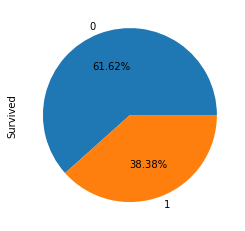

In [6]:
# Overall Surival Rate
train_data['Survived'].value_counts().plot.pie(autopct = '%1.2f%%');

#### 3.1.1 Sex & Survival rate 

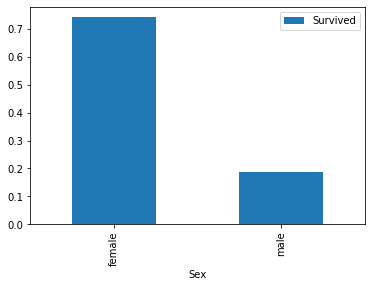

In [7]:
# Sex & Survival rate 
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar();

**Observation**: Female passengers had higher survival chance. 

#### 3.1.2 Class & Survival rate

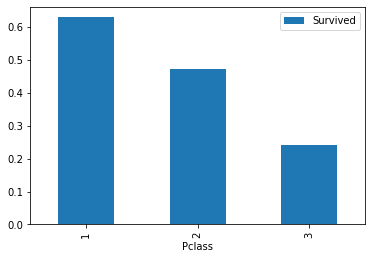

In [8]:
# Class & Survival rate 
train_data[['Pclass', 'Survived']].groupby('Pclass').mean().plot.bar();

**Observation**: Surival rate Class 1 > Class 2 > Class 3

#### 3.1.3 Family size & Survival rate

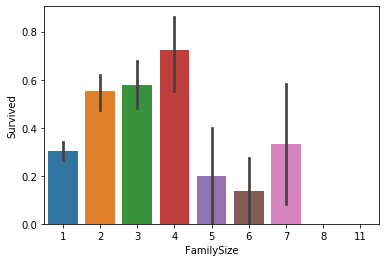

In [9]:
# Family Size 
train_data['FamilySize'] = train_data['Parch'] + train_data['SibSp'] + 1 
test_data['FamilySize'] = test_data['Parch'] + test_data['SibSp'] + 1 

sns.barplot(data=train_data, x='FamilySize', y='Survived');

**Observation:** Passengers with small family size (2-4) were more likely to survive. 

Therefore, the passengers are grouped into 3 groups according the size of family: singleton, SmallFamily (family size 2-4) and LargeFamily (family size larger than 4).

In [10]:
# Feature engineering
train_data['Singleton'] = train_data['FamilySize'].map(lambda s: 1 if s == 1 else 0)
train_data['SmallFamily'] = train_data['FamilySize'].map(lambda s: 1 if 2<= s <= 4 else 0)
train_data['LargeFamily'] = train_data['FamilySize'].map(lambda s: 1 if s>=5 else 0)

test_data['Singleton'] = test_data['FamilySize'].map(lambda s: 1 if s == 1 else 0)
test_data['SmallFamily'] = test_data['FamilySize'].map(lambda s: 1 if 2<= s <= 4 else 0)
test_data['LargeFamily'] = test_data['FamilySize'].map(lambda s: 1 if s>=5 else 0)

#### 3.1.4 Age & Survival rate

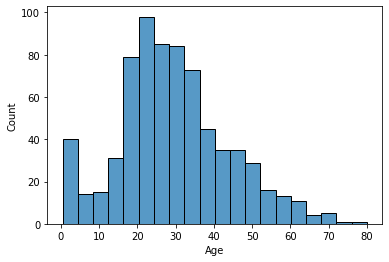

In [11]:
# Age & Survival Rate 
age_data = train_data[train_data['Age'].notna()][['Age', 'Survived']]
sns.histplot(age_data['Age']);

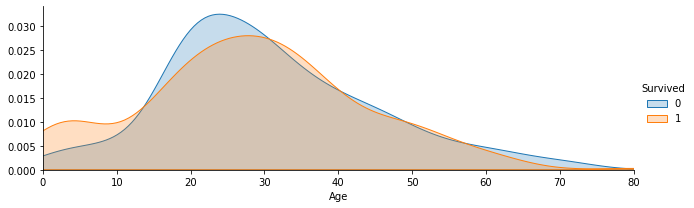

In [12]:
ageFacet=sns.FacetGrid(train_data,hue='Survived',aspect=3);
ageFacet.map(sns.kdeplot,'Age',shade=True);
ageFacet.set(xlim=(0,train_data['Age'].max()));
ageFacet.add_legend();

**Observation:** Passengers aged under 10 were more likely to survive.

#### 3.1.5 Fare & Survival rate

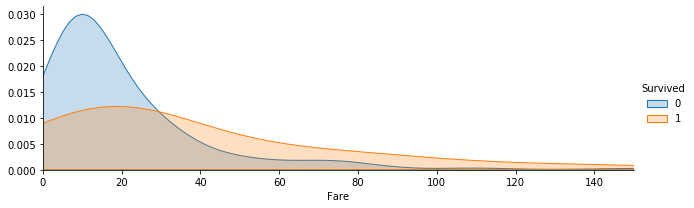

In [13]:
# Fare & Survival Rate
fareFacet=sns.FacetGrid(train_data,hue='Survived',aspect=3);
fareFacet.map(sns.kdeplot,'Fare',shade=True);
fareFacet.set(xlim=(0,150));
fareFacet.add_legend();

**Observation:** Low survival rate for fare < 20.

#### 3.1.6 Embarked port & Survival rate

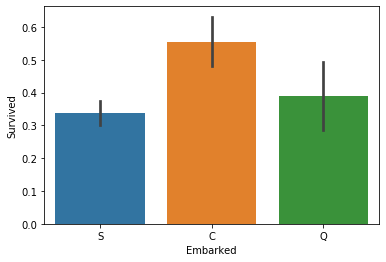

In [14]:
# Embarked & Survival Rate
sns.barplot(data=train_data,x='Embarked',y='Survived');

**Observations:** Passengers embarked from port C were more likely to survive.

#### 3.1.7 Name (Title) & Survival rate

The titles of the passengers can be extracted from their names. Passengers from different social classes may have different survival chance.

In [15]:
# Extract titles
train_data['Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Ms            1
Don           1
Lady          1
Mme           1
Sir           1
Countess      1
Capt          1
Jonkheer      1
Name: Title, dtype: int64

In [16]:
# Group the passengers into 6 groups by their titles.
Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "Countess":   "Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"
                        }
train_data['Title']=train_data['Title'].map(Title_Dictionary)
test_data['Title']=test_data['Title'].map(Title_Dictionary)
train_data['Title'].value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

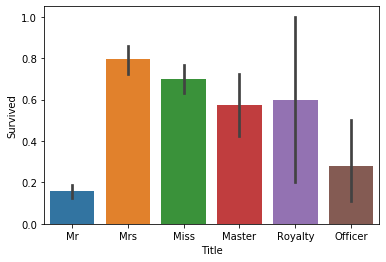

In [17]:
sns.barplot(data=train_data, x='Title', y='Survived');

**Observation:** Passengers with "Mr" and "Officer" titles had low survival chance.

#### 3.1.8 Cabin & Survival rate
The Cabin information can tell which decks the passengers were resided, which may influence the survival rate. 
The Cabin variables have many missing values. THe missing values will be replaced by "Unknown".

In [18]:
train_data['Cabin'] = train_data['Cabin'].fillna('Unknown')
test_data['Cabin'] = test_data['Cabin'].fillna('Unknown')

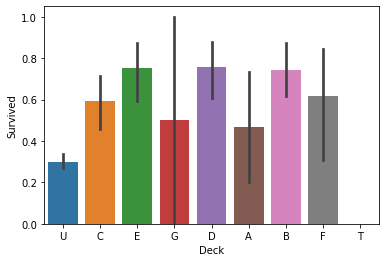

In [19]:
# Cabin 
train_data['Deck']=train_data['Cabin'].map(lambda x:x[0])
test_data['Deck']=test_data['Cabin'].map(lambda x:x[0])
sns.barplot(data=train_data, x='Deck', y='Survived');

**Observation:** Passengers in Deck B, D, E were more likely to survive.

### 3.2 Data pre-processing

#### 3.2.1 Combine all data for data pre-processing

In [20]:
full_data = pd.concat([train_data, test_data], axis=0)

#### 3.2.2 Fill the missing values

##### Embarked

In [21]:
# Embarked
full_data[full_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Singleton,SmallFamily,LargeFamily,Title,Deck
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,1,0,0,Miss,B
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,1,0,0,Mrs,B


In [22]:
full_data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

Fill the missing value of the Embarked feature with the most frequent value.

In [23]:
full_data['Embarked'] = full_data['Embarked'].fillna('S')

##### Fare

In [24]:
# Fare 
full_data[full_data['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Singleton,SmallFamily,LargeFamily,Title,Deck
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,Unknown,S,1,1,0,0,Mr,U


Fill the missing value of the Fare feature with the mean value.

In [25]:
full_data['Fare']=full_data['Fare'].fillna(full_data[(full_data['Pclass']==3)&(full_data['Embarked']=='S')&(full_data['Cabin']=='Unknown')]['Fare'].mean())

##### Age 
The Random Forest algorithm is used to fill the missing of the Age feature. 

In [26]:
AgePre = full_data[['Age','Pclass','Title','FamilySize','Sex']]
AgePre = pd.get_dummies(AgePre)
AgePre.head()

,Age,Pclass,FamilySize,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Sex_female,Sex_male
0,22.0,3,2,0,0,1,0,0,0,0,1
1,38.0,1,2,0,0,0,1,0,0,1,0
2,26.0,3,1,0,1,0,0,0,0,1,0
3,35.0,1,2,0,0,0,1,0,0,1,0
4,35.0,3,1,0,0,1,0,0,0,0,1


In [27]:
# Split the dateset
AgeKnown=AgePre[AgePre['Age'].notnull()]
AgeUnKnown=AgePre[AgePre['Age'].isnull()]

AgeKnown_X=AgeKnown.drop(['Age'],axis=1)
AgeKnown_y=AgeKnown['Age']

AgeUnKnown_X=AgeUnKnown.drop(['Age'],axis=1)

# Setup the random forest model
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=None,n_estimators=500,n_jobs=-1)
rfr.fit(AgeKnown_X,AgeKnown_y)

# Model evaluation
rfr.score(AgeKnown_X,AgeKnown_y)

0.4911278076281459

In [28]:
# Predict age
AgeUnKnown_y=rfr.predict(AgeUnKnown_X)
# Fill the mssing value
full_data.loc[full_data['Age'].isnull(),['Age']]=AgeUnKnown_y
# Create featuer IsChild (less than 10 years old)
full_data['IsChild'] = full_data['Age'].map(lambda s: 1 if s <= 10 else 0)
full_data.info() # no missing values now (except Survived)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  FamilySize   1309 non-null   int64  
 13  Singleton    1309 non-null   int64  
 14  SmallFamily  1309 non-null   int64  
 15  LargeFamily  1309 non-null   int64  
 16  Title        1309 non-null   object 
 17  Deck         1309 non-null   object 
 18  IsChild      1309 non-null   int64  
dtypes: floa

In [29]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Singleton,SmallFamily,LargeFamily,Title,Deck,IsChild
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,2,0,1,0,Mr,U,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,1,0,Mrs,C,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1,1,0,0,Miss,U,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,1,0,Mrs,C,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,1,1,0,0,Mr,U,0


#### 3.2.2 Select the features

In [30]:
# Remove the less revelant features
fullSel=full_data.drop(['Cabin','Name','Ticket','PassengerId'],axis=1)
# Check the correlations of the features
corrDf=pd.DataFrame()
corrDf=fullSel.corr()
corrDf['Survived'].sort_values(ascending=True)

Pclass        -0.338481
Singleton     -0.203367
LargeFamily   -0.125147
Age           -0.065783
SibSp         -0.035322
FamilySize     0.016639
Parch          0.081629
IsChild        0.125678
Fare           0.257307
SmallFamily    0.279855
Survived       1.000000
Name: Survived, dtype: float64

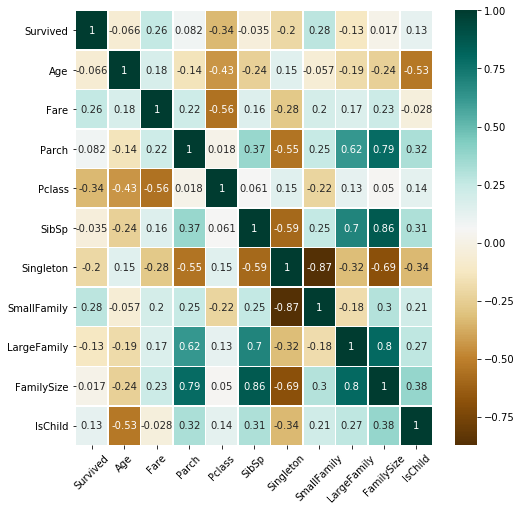

In [32]:
# Heatmap
plt.figure(figsize=(8,8));
sns.heatmap(fullSel[['Survived','Age','Embarked','Fare','Parch','Pclass',
                    'Sex','SibSp','Title','Singleton','SmallFamily','LargeFamily','FamilySize','IsChild','Deck']].corr(),cmap='BrBG',annot=True,
           linewidths=.5);
plt.xticks(rotation=45);

In [33]:
fullSel=fullSel.drop(['SibSp','Parch','FamilySize','Age'],axis=1)

#### 3.2.3 One-hot encoding

In [34]:
# One-hot encoding
fullSel=pd.get_dummies(fullSel)
PclassDf=pd.get_dummies(full_data['Pclass'],prefix='Pclass')

In [35]:
PclassDf.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [36]:
fullSel = pd.concat([fullSel, PclassDf], axis=1)

In [37]:
fullSel.drop('Pclass', axis=1, inplace=True)

In [38]:
fullSel.head()

,Survived,Fare,Singleton,SmallFamily,LargeFamily,IsChild,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Pclass_1,Pclass_2,Pclass_3
0,0.0,7.2500,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1.0,71.2833,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,1.0,7.9250,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1.0,53.1000,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.0,8.0500,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


#### 3.2.2.4 Normalization

In [39]:
fullSel[fullSel.columns] = fullSel[fullSel.columns].apply(lambda x: x/x.max(), axis=0)

In [40]:
fullSel.head()

,Survived,Fare,Singleton,SmallFamily,LargeFamily,IsChild,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Pclass_1,Pclass_2,Pclass_3
0,0.0,0.014151,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.139136,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.015469,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.103644,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.015713,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [41]:
fullSel.to_csv('combined_data.csv', index=False)

### 3.2.3 Split the dataset

In [42]:
train = fullSel[fullSel['Survived'].notnull()]
test = fullSel[fullSel['Survived'].isnull()]
targets = train['Survived']
train.drop('Survived', axis=1, inplace=True)
test.drop('Survived', axis=1, inplace=True)

X_train,X_val,Y_train,Y_val = train_test_split(train,targets,test_size = 0.2,random_state = 42)

## 5. Define the model
A neural network model with 3 layers are chosen. The model is implemented using Keras.

In [43]:
x = X_train
y = Y_train
L1=20
L2=20
L3=5
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(L1,input_shape=(X_train.shape[1],),kernel_regularizer='l2', activation='relu'))
model.add(tf.keras.layers.Dense(L2,kernel_regularizer='l2', activation='relu'))
model.add(tf.keras.layers.Dense(L3,kernel_regularizer='l2', activation='relu'))
model.add(tf.keras.layers.Dense(1,kernel_regularizer='l2', activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## 6. Train and fine-tune model

In [44]:
epoch = 50
history = model.fit(x,y,epochs=epoch,batch_size=32,verbose=0)
preds = model.evaluate(x=X_val, y=Y_val)
print(L1,L2,L3)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
print ("Training Accuracy = " + str(history.history['accuracy'][-1]))

6/6 [==============================] - 0s 758us/step - loss: 0.5217 - accuracy: 0.8268
20 20 5
Loss = 0.5216637253761292
Test Accuracy = 0.826815664768219
Training Accuracy = 0.8300561904907227


In [45]:
model.save('dnn.h5', save_format='h5')

In [46]:
history = model.fit(train,targets,epochs=epoch,batch_size=32,verbose=0)
preds = model.evaluate(x=X_val, y=Y_val)
print ("Loss = " + str(preds[0]))
print ("Accuracy = " + str(history.history['accuracy'][-1]))

6/6 [==============================] - 0s 634us/step - loss: 0.4922 - accuracy: 0.8324
Loss = 0.49221670627593994
Accuracy = 0.8316498398780823


## 7. Test and deploy model

In [47]:
l = model.predict(test)

In [48]:
survived = [1 if x > 0.5 else 0 for x in l]
#original_test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
original_test_data = pd.read_csv('./Dataset/test.csv')
submission = pd.DataFrame({
    'PassengerId': original_test_data['PassengerId'],
    'Survived':  survived
})

submission.to_csv('titanic-nn.csv', index=False)